In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Bondora_Features_Selection_File.csv')
df.head()

,Unnamed: 0,BidsPortfolioManager,Interest,MonthlyPayment,Rating,PrincipalPaymentsMade,NoOfPreviousLoansBeforeLoan,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,Target
0,0,0,30.0,119.083443,5,115.0408,1,0.00,0.00,83.0852,0.0000,0
1,1,0,25.0,119.083443,5,140.6057,2,0.00,0.00,255.6467,258.6256,0
2,2,0,25.0,119.083443,5,203.1909,0,116.35,414.07,0.0000,0.0000,1
3,3,0,45.0,119.083443,5,57.5205,1,0.00,0.00,134.2144,0.0000,0
4,4,0,30.0,119.083443,5,319.5436,1,0.00,0.00,146.9966,0.0000,1


In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df.head()

,BidsPortfolioManager,Interest,MonthlyPayment,Rating,PrincipalPaymentsMade,NoOfPreviousLoansBeforeLoan,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,Target
0,0,30.0,119.083443,5,115.0408,1,0.00,0.00,83.0852,0.0000,0
1,0,25.0,119.083443,5,140.6057,2,0.00,0.00,255.6467,258.6256,0
2,0,25.0,119.083443,5,203.1909,0,116.35,414.07,0.0000,0.0000,1
3,0,45.0,119.083443,5,57.5205,1,0.00,0.00,134.2144,0.0000,0
4,0,30.0,119.083443,5,319.5436,1,0.00,0.00,146.9966,0.0000,1


In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (107623, 10)
y_train: (107623,)
X_test: (26906, 10)
y_test: (26906,)


In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18079   290]
 [  859  7678]]


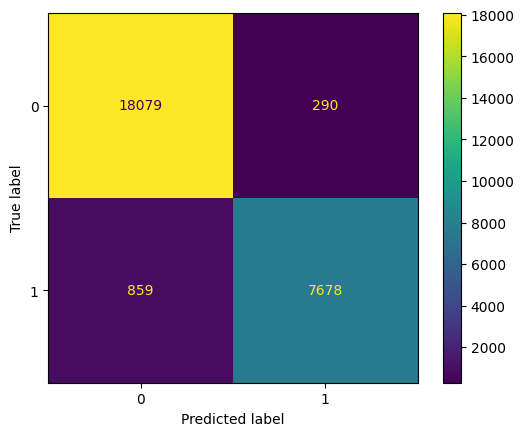

In [ ]:
# Generate predictions with the best model
y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
print(y_pred)

[0 0 1 ... 0 0 0]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9572957704601204


Text(0.5, 1.0, 'Accuracy Score: 0.9572957704601204')

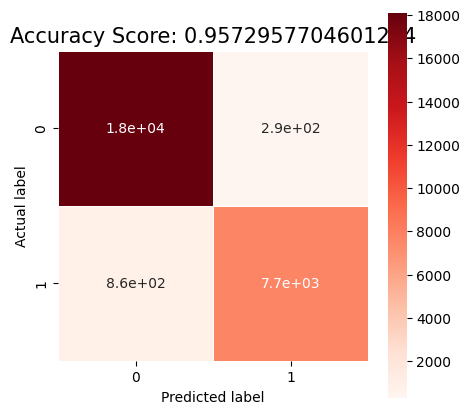

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Reds')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [53]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18369
           1       0.96      0.90      0.93      8537

    accuracy                           0.96     26906
   macro avg       0.96      0.94      0.95     26906
weighted avg       0.96      0.96      0.96     26906

